<a href="https://colab.research.google.com/github/Febilid/Pem_Mesin/blob/main/JS3_TP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

# Load the dataset
file_path = '/content/insurance.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset and dataset information
df_info = df.info()
df_head = df.head()

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(None,
    age     sex     bmi  children smoker     region      charges
 0   19  female  27.900         0    yes  southwest  16884.92400
 1   18    male  33.770         1     no  southeast   1725.55230
 2   28    male  33.000         3     no  southeast   4449.46200
 3   33    male  22.705         0     no  northwest  21984.47061
 4   32    male  28.880         0     no  northwest   3866.85520)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the dataset into features (X) and target (y)
X = df.drop(columns='charges')
y = df['charges']

# Define categorical and numerical columns
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

# One-hot encode categorical variables and scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split the data into train and test sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline that includes preprocessing and linear regression
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

r2, mse, mae


(0.7835929767120722, 33596915.851361476, 4181.194473753652)

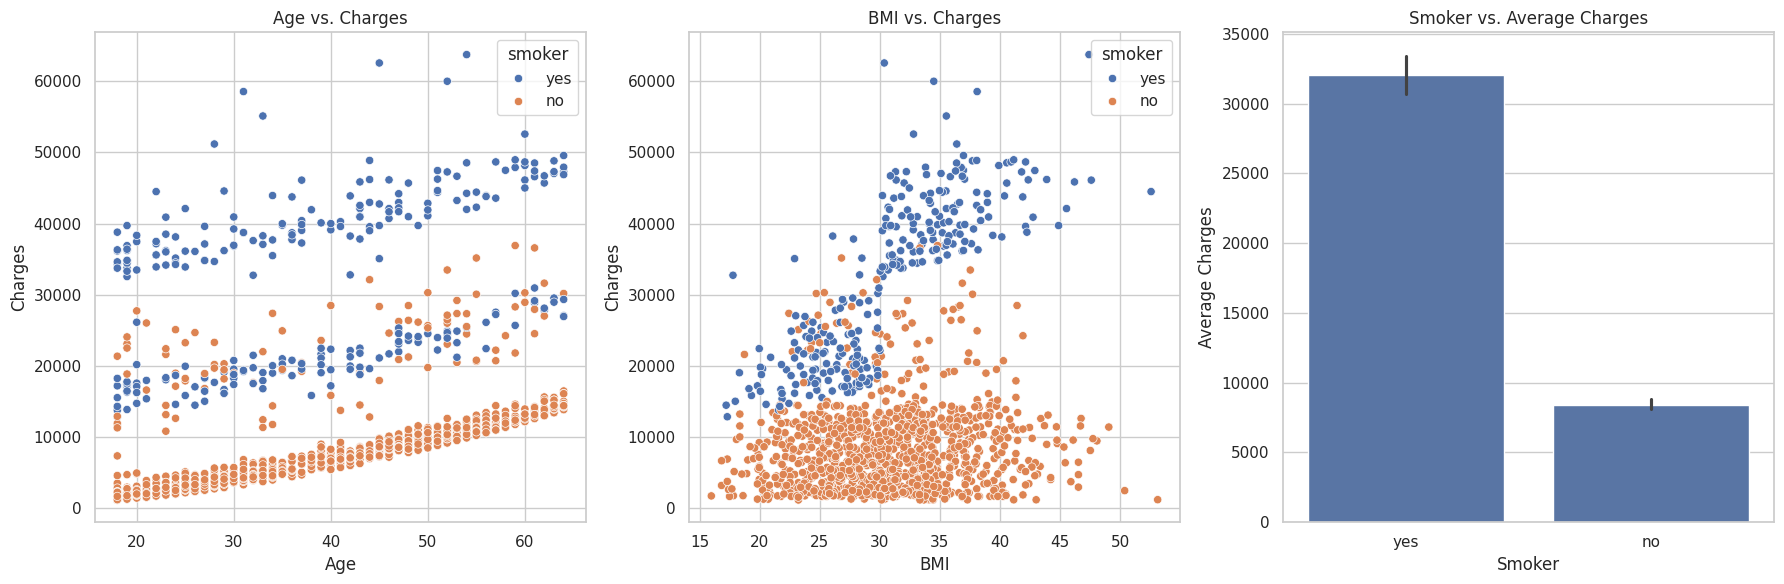

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Scatter plot for Age vs. Charges
sns.scatterplot(x='age', y='charges', data=df, ax=axes[0], hue='smoker')
axes[0].set_title('Age vs. Charges')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Charges')

# Scatter plot for BMI vs. Charges
sns.scatterplot(x='bmi', y='charges', data=df, ax=axes[1], hue='smoker')
axes[1].set_title('BMI vs. Charges')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Charges')

# Bar plot for Smoker vs. Average Charges
sns.barplot(x='smoker', y='charges', data=df, ax=axes[2])
axes[2].set_title('Smoker vs. Average Charges')
axes[2].set_xlabel('Smoker')
axes[2].set_ylabel('Average Charges')

# Show the plots
plt.tight_layout()
plt.show()


In [11]:
# Memisahkan fitur (X) dan target (y)
X = df.drop(columns='charges')
y = df['charges']


In [10]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi data latih (train) dan data uji (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Kolom numerik dan kategorikal
numerical_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Feature scaling untuk kolom numerik, OneHotEncoder untuk kolom kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [8]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Membuat pipeline dengan preprocessor dan model regresi linear
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())])


In [7]:
# Latih model dengan data latih
pipeline.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = pipeline.predict(X_test)


In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluasi model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Tampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")


R-squared: 0.7835929767120722
Mean Squared Error (MSE): 33596915.851361476
Mean Absolute Error (MAE): 4181.194473753652
